In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from keras.src.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [1]:
pokedex_dir="../dataset"

In [3]:
pokedex_datagen=ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.1,
                                   rotation_range=0.2,
                                   featurewise_center=True,
                                   featurewise_std_normalization=True,
                                   horizontal_flip=True,vertical_flip=True,
                                   dtype="uint8",
                                   validation_split=0.3
                                   )

In [4]:
pokedex_dataset=pokedex_datagen.flow_from_directory(pokedex_dir,target_size=(256,256),color_mode="rgba")


Found 22133 images belonging to 152 classes.


In [21]:
pokedex_datagen.fit(pokedex_dataset)

KeyboardInterrupt: 

In [22]:
pokedex_dataset.image_shape

(256, 256, 4)

In [23]:
num_classes=len(os.listdir(pokedex_dir))
num_classes

152

## @Todo:
1) build a model that compiles the model and plots the efficiency after a range of parameters

In [24]:
# build_model(num_classes,input_shape=(256,256,3),num_conv_layers_range=[3])

In [25]:
pokedex_dataset.image_shape

(256, 256, 4)

In [54]:
def build_model(num_classes,input_shape=(256,256,4)):
    history=[] 
    model=Sequential()
    model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    
    model.add(Dense(128,activation="relu"))
    model.add(Dense(64,activation="relu"))
    # model.add(Dropout(0.3))
    model.add(Dense(num_classes,activation="softmax"))
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.SGD(),metrics=["accuracy"])
    return model



In [55]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs["accuracy"]>=0.99:
            print("99% acc reached ending the training")
            self.model.stop_training=True

In [56]:
myCallback=myCallback()

In [57]:
def train_model(model:tf.keras.models.Sequential, train_dataset: tf.data.Dataset):
    history=[]
    history=model.fit(train_dataset,callbacks=[myCallback],epochs=10,batch_size=32,steps_per_epoch=692)
    return history
        

In [58]:
model=build_model(num_classes)

In [90]:
import matplotlib.pyplot as plt

def plot_filters(layer):
    filters, biases = layer.get_weights()
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    n_filters = filters.shape[3]
    n_cols = 8  # Number of columns in the grid
    n_rows = (n_filters + n_cols - 1) // n_cols

    plt.figure(figsize=(20, 20))
    for i in range(n_filters):
        f = filters[:, :, :, i]
        for j in range(3):
            ax = plt.subplot(n_rows, n_cols, i + 1)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(f[:, :, j], cmap='gray')
    plt.show()


In [62]:


model = build_model(num_classes)
history=model.fit(pokedex_dataset,callbacks=[myCallback],epochs=1000,batch_size=888,steps_per_epoch=25)
second_conv_layer = model.layers[2]  
plot_filters(second_conv_layer)


Epoch 1/1000
 2/25 [=>............................] - ETA: 22s - loss: 0.6899 - accuracy: 0.0156

KeyboardInterrupt: 

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))

In [88]:
def plot_feature_maps(model, layer_index, input_image):
    layer_output = model.layers[layer_index].output
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_output)
    input_image = np.expand_dims(input_image, axis=0)
    feature_maps = activation_model.predict(input_image)
    num_features = feature_maps.shape[-1]
    n_cols = 8  # Number of columns in the grid
    n_rows = (num_features + n_cols - 1) // n_cols

    plt.figure(figsize=(20, 20))
    for i in range(num_features):
        ax = plt.subplot(n_rows, n_cols, i + 1)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, i], cmap='gray')
    plt.show()

In [89]:
test_image = next(pokedex_dataset)
test_image[0][0].shape

(256, 256, 4)

1/1 [==============================] - 0s 47ms/step


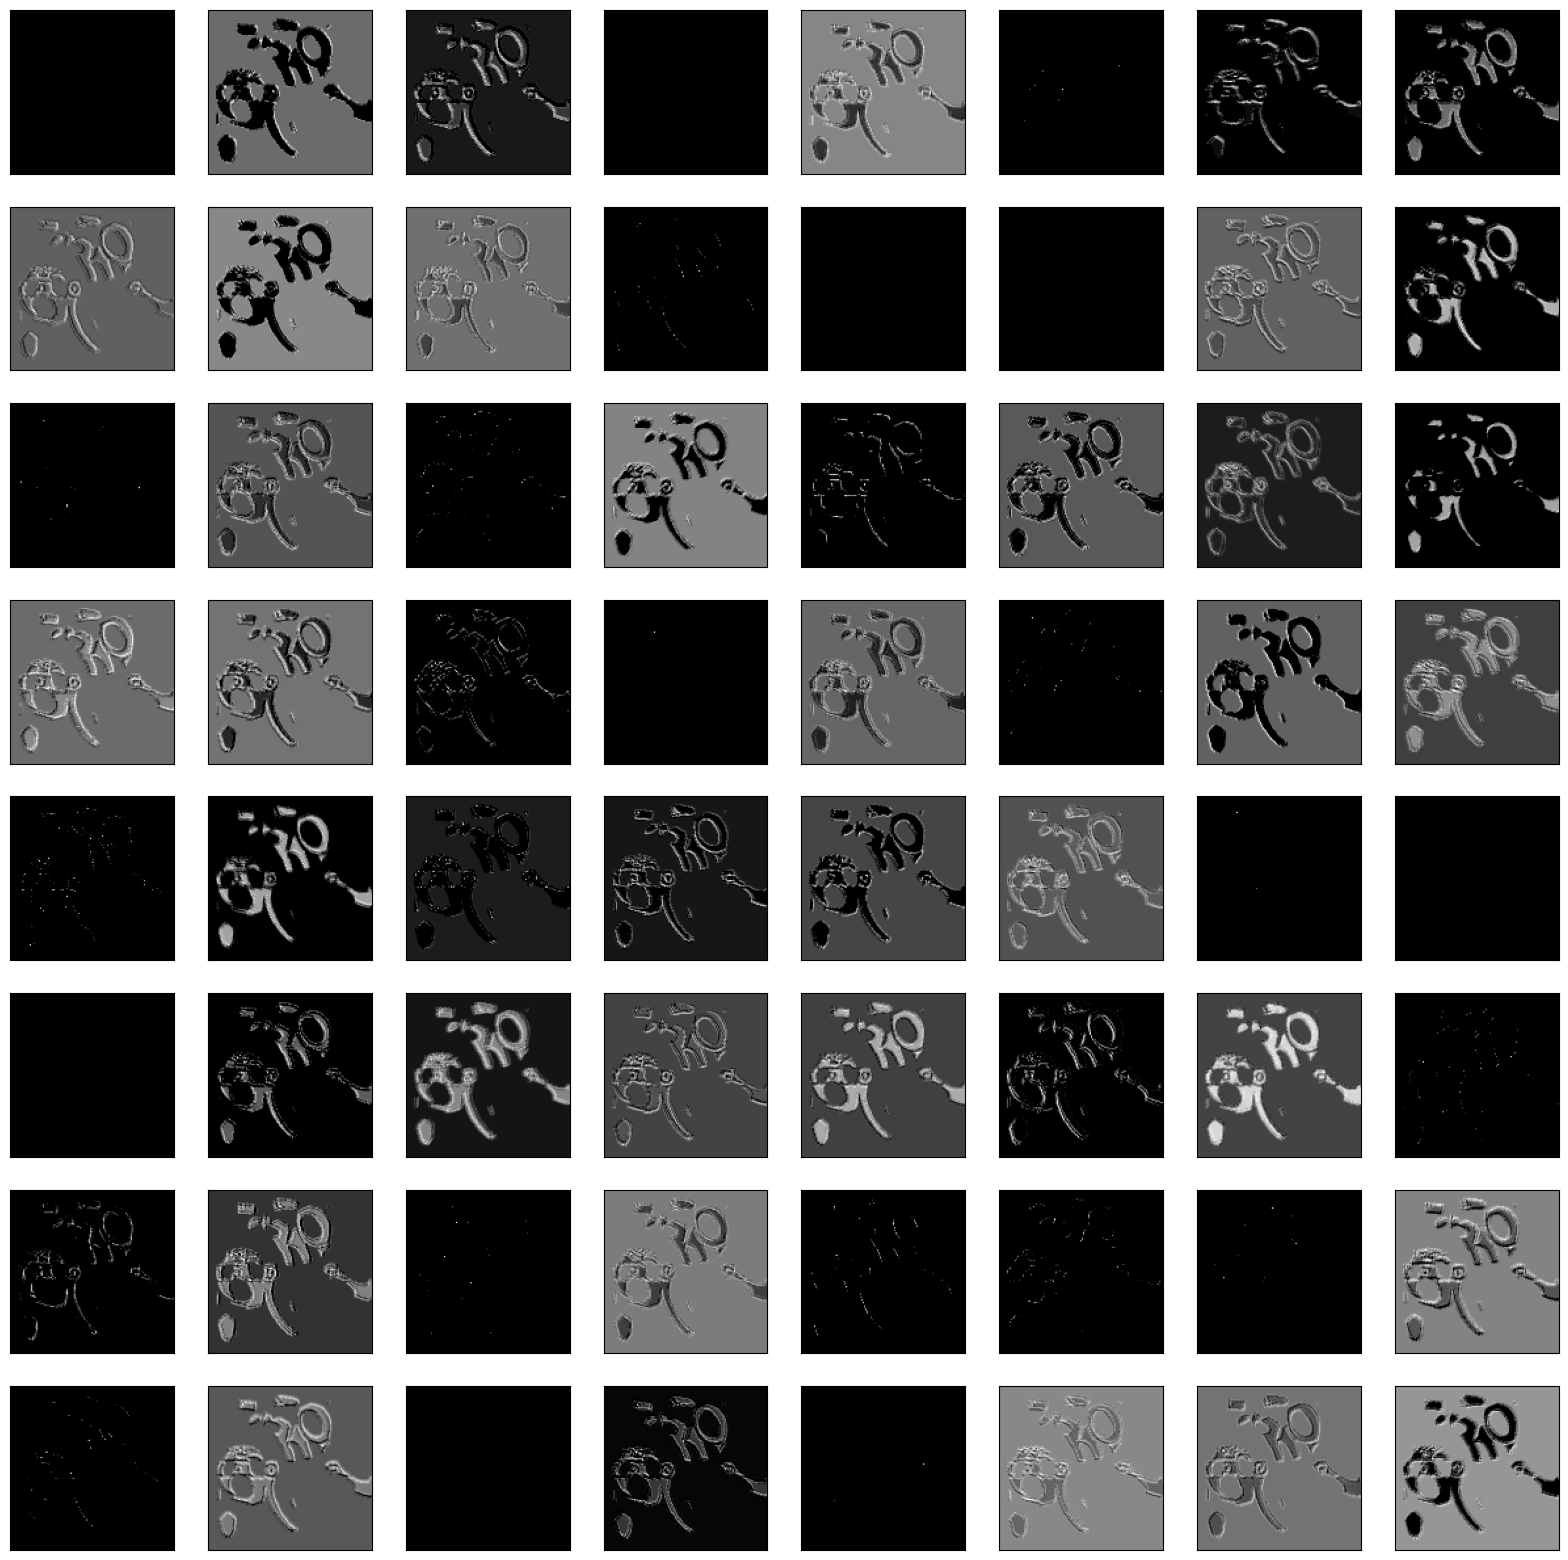

In [84]:

plot_feature_maps(model,2,test_image[0][0])

In [115]:
img=tf.io.read_file("../dataset/Abra/2eb2a528f9a247358452b3c740df69a0.jpg")
img_tensor = tf.image.decode_jpeg(img, channels=3)
img_tensor=np.expand_dims(img_tensor, axis=0)
img_tensor

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [91]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 254, 254, 32)      1184      
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_16 (Flatten)        (None, 246016)            0         
                                                                 
 dense_48 (Dense)            (None, 128)             

In [95]:
model_dir="../models"

In [96]:
model.save(f"{model_dir}/pokedex_cnn.keras",save_format='tf')